## Parte 2:

## Job salary prediction
Se trabajará con el problema de identificar cual es el sueldo que ofrecen los avisos, aunque no este de forma explicita.

> a) Carge los datos csv de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de pandas. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto?

In [ ]:
import pandas as pd
df = pd.read_csv("Train_rev1.csv")
df_train = df.iloc[:-10000]
df_val = df.iloc[-10000:]
rows = [line.split(" ",1) for line in df_train['FullDescription']()]

df_train.shape
    

In [ ]:
df_train.info()

In [ ]:
df_train.head(3)

In [ ]:
df_train['SalaryNormalized'].value_counts()

In [ ]:
import seaborn as sns
%matplotlib inline
sns.countplot(x= 'SalaryNormalized',data=df_train)

Cada dato tiene 12 parámetros, estos se describen por si mismo. Id y SalaryNormalized representan valores enteros, el resto son strings.
El arreglo es una matriz de 234768 x 12 donde cada fila es un dato con sus parámetros, algunas filas tienen parametros vacios.
Se trata de un problema de  valoración

> b) Extraiga los datos de cada conjunto con los que trabajará, el input  XX , los textos, y el output  yy , los salarios.


Los datos que nos interesan para analizar serán aquellos que entregen información sobre el trabajo, sus características y requerimientos. La descripción del puesto, su categoria y el titulo profesional, ademas del tipo y tiempo de contrato y la compañía pueden afectar a dinero ofrecido. De igual manera la ubicación puede afectar.

In [ ]:
text = df.FullDescription
salary = df.SalaryNormalized
rows = [line.split(" ") for line in text]
df_train = pd.DataFrame(rows, columns=['Text','Salary'])
df_train.head(2)


> c) Realice un pre-procesamiento a los datos brutos de texto para extraer características y generar la representación de los datos de entrada al modelo $\vec{x}$. Comente sobre lo realizado.

In [ ]:
import nltk
nltk.download('stopwords')
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor1(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

print(word_extractor1('I love to eat cake'))
print(word_extractor1("I love eating cake"))
print(word_extractor1("I loved eating the cake"))
print(word_extractor1("I do not love eating cake"))
print(word_extractor1("I don't love eating cake"))

In [ ]:
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
model.fit(text,salary)

#measure F.O.
y=df.array(salary)
x=df.array(text)

mean_absolute_error=MAE

from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(salary, model.predict(text))
#print("MAE on validation: ",mean_absolute_error(salary, model.predict(text)))

## Parte 3:

Para el desarrollo de la parte 3 se desarrollaron funciones que satisfacen lo estipulado en cada item y considerando además la incertidumbre sobre si realmente la pendiente b que estamos buscando es constante, ya que la funcion gradiente de b que podemos obtener analiticamente dependerá de los puntos a considerar a no ser que se fijen las condiciones necesarias que veremos más adelante.

In [1]:
def productopunto(x,b):
    b = np.asarray(b)
    x = np.asarray(x)
    prod = 0
    for i in range(b.size):
        prod = prod + b[i]*x[i]
    return prod;

A continuación se resumen las funciones generadas en la parte a considerando el caso de una dimension (loss_1) y una para varias dimensiones (loss_n) (parte a)

In [119]:

def loss_1(b,x,y):
    #Esto fue introducido para que python reconozca los arreglos recibidos
    b = np.asarray(b) # b es la pendiente que queremos encontrar
    x = np.asarray(x)# x corresponde al eje x
    y = np.asarray(y)# y corresponde al eje y
    loss=0
    n = y.size
    for i in range(n):
        loss = loss + ((b[i]*x[i] - y[i] )**2)/n# mas que nada aqui calculamos la funcion perdida.
    return loss

def loss_n(b,x,y):
    b = np.asarray(b)
    x = np.asarray(x)
    y = np.asarray(y)
    nx = np.shape(x)
    loss=0
    for i in range(nx[1]):
        p_product = productopunto(x[i],b)#en varias variablesconsideramos bx como un funcional de R^n -> R   con n>1 
        loss = loss +  ((p_product - y[i])**2)/nx[0]
    return loss; 


La parte siguiente corresponde al calculo del gradiente para ser empleado en los otros ejercicios, esto sería equivalente a la parte (b)

In [169]:
def grad_1(b,x,y):
    grad = 0
    b = np.asarray(b)
    x = np.asarray(x)
    y = np.asarray(y)
    n = y.size
    for i in range(n):
        grad = grad + (x[i]*(b[i]*x[i] - y[i] )*2)/n # es el producto punto.
    return grad;
def grad_n(b,x,y):
    grad = 0
    b = np.asarray(b)
    x = np.asarray(x)
    y = np.asarray(y)
    nx = np.shape(x)
    for i in range(nx[1]):
        p_product = productopunto(x[i],b)
        grad = grad + (np.multiply(X[i],(p_product - Y[i] )*2*(1/nx[0])))
    return grad;        

Para la parte c con la ayuda de los apuntes del curso y la bibliografia se crearon dos funciones que calculan la derivada analiticamente para 1 dimension (R->R ) y para (R^n -> R)

In [36]:
#dados dos puntos x,y, estas funciones calculan el gradiente respecto a los valores entregados a la funcion

def grad_1real(x,y): # la derivada en una dimension
    x = np.asarray(x)
    y = np.asarray(y)
    b = 0    
    n = y.size
    if x!=0: 
        b = (y/x) 
    else:
        b = 0 
    return b
# aqui se entregan balores para x,y, pero consideraremos x como un vector de n dimensiones
def grad_nreal(x,y):#Esto fue una prueba considerando varias dimensiones para el dominio y la pendiente no consante
    x = np.asarray(x)#Qué sucedería con nuestra regresion si se aproxima a la pendiente más pequeña o la más grande?
    y = np.asarray(y)#solucion: el error seguiria siendo alto
    nx = np.shape(x)
    b = np.zeros(nx[1]) 
    temp = np.zeros(nx[1])
    error_temp = 8888
    for i in range(nx[1]):
        rest = productopunto(x[i],x[i])
        if rest!=0: 
            b = (1/rest)*(y[i]*x[i]) 
            loss = loss_n(b,x,y)
            if loss<error_temp:
                temp = b
                error_temp = loss
            else:
                continue
    return b

In [76]:
#Parte C
def grad_analitico(x,y):
    x = np.asarray(x)#Qué sucedería con nuestra regresion si se aproxima a la pendiente más pequeña o la más grande?
    y = np.asarray(y)#solucion: el error seguiria siendo alto
    nx = np.shape(x)
    b = np.zeros(nx[1])
    x_tr =x.transpose() 
    x_trx_inv = np.linalg.inv(np.matmul(x_tr,x))
    b = (np.matmul(x_trx_inv,x_tr)).dot(y)
    return b

A continuación se presenta el algoritmo de entrenamiento con una condición extra que consiste en añadir un número finito de iteraciones para evitar loops largos.

In [145]:
def SGD(x,y,nn, tol):#esta funcion solo se creo en varias variables por el hecho de que en una variable es más directo
    x = np.asarray(x)
    y = np.asarray(y)
    nx = np.shape(x)
    b = np.zeros(nx[1])#genero un vector b de las dimensiones de x
    dummycontrol = 0 # es una variable para evitar loop infinitos y acabar de golpe.
    grad_f = 0
    loss = 5000
    while loss >  tol and dummycontrol <= 1000000000:
        grad_f = grad_n(b,x,y)#se utilizan las tres funciones para calcular el gradiente
        b = b - np.multiply(nn,grad_f)# emplear el algoritmo
        loss = loss_n(b,x,y)# calcular el error asociado y esperar de buena fe que sea menor a la tolerancia aceptada
        dummycontrol+= 1
    return b
    
def SGD_it_error(x,y,nn,it):
    x = np.asarray(x)
    y = np.asarray(y)
    nx = np.shape(x)
    y_loss = np.zeros(1000)
    b = np.zeros(nx[1])#genero un vector b de las dimensiones de x
    dummycontrol = 0 # es una variable para evitar loop infinitos y acabar de golpe.
    grad_f = 0
    loss = 5000
    while dummycontrol < it:
        grad_f = grad_n(b,x,y)#se utilizan las tres funciones para calcular el gradiente
        b = b - nn*grad_f# emplear el algoritmo
        loss = loss_n(b,x,y)# calcular el error asociado y esperar de buena fe que sea menor a la tolerancia aceptada
        y_loss[dummycontrol] = loss
        dummycontrol+= 1
    return  y_loss;

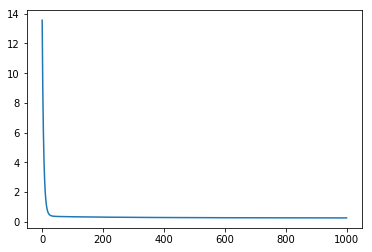

In [138]:
#Parte D
import matplotlib.pyplot as plt # grafico del error
from sklearn.datasets import load_boston
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
X_train,y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)#cada vector tiene 13 componentes y son 506 los que entrega
X = X_train
Y = y_train
x_loss = np.arange(1000)#nro iteraciones
y_loss = SGD_it_error(X,Y,0.5,1000)
plt.plot(x_loss,y_loss)
plt.show() 
        
    
#https://gluon.mxnet.io/chapter06_optimization/gd-sgd-scratch.html
 

Para la parte F consideraremos solo los print con coeficientes de 0.1 a 0.1 sin incluir los bordes del intervalo (0,1) a partir de las funciones antes creadas.

In [172]:
#Parte F
from sklearn.datasets import load_boston
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
X_train,y_train = load_boston(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)#cada vector tiene 13 componentes y son 506 los que entrega
X = X_train
Y = y_train
count = 0
tol = 0.3
b1 = SGD(X,Y, 0.1, tol)
print("Con coeficiente de aprendizaje = 0.1,")
print("b = ", b1)
print("Con error = ", loss_n(b1,X,Y))
b2 = SGD(X,Y, 0.2, tol)
print("Con coeficiente de aprendizaje = 0.2,")
print("b = ",b2)
print("Con error = ", loss_n(b2,X,Y))
b3 = SGD(X,Y, 0.3, tol)
print("Con coeficiente de aprendizaje = 0.3,")
print("b = ", b3)
print("Con error = ", loss_n(b3,X,Y))
b4 = SGD(X,Y, 0.4, tol)
print("Con coeficiente de aprendizaje = 0.4,")
print("b = ", b4)
print("Con error = ", loss_n(b4,X,Y))
b5 = SGD(X,Y, 0.5, tol)
print("Con coeficiente de aprendizaje = 0.5,")
print("b = ", b5)
print("Con error = ", loss_n(b5,X,Y))
b6 = SGD(X,Y, 0.6, tol)
print("Con coeficiente de aprendizaje = 0.6,")
print("b = ", b6)
print("Con error = ", loss_n(b6,X,Y))
b7 = SGD(X,Y, 0.7, tol)
print("Con coeficiente de aprendizaje = 0.7,")
print("b = ", b7)
print("Con error = ", loss_n(b7,X,Y))
b8 = SGD(X,Y, 0.8, tol)
print("Con coeficiente de aprendizaje = 0.8,")
print("b = ", b8)
print("Con error = ", loss_n(b8,X,Y))
b9 = SGD(X,Y, 0.9, tol)
print("Con coeficiente de aprendizaje = 0.9,")
print("b = ", b9)
print("Con error = ", loss_n(b9,X,Y))




Con coeficiente de aprendizaje = 0.1,
b =  [-2.83444559 -2.46408404 -3.94024081 -1.87248978 -4.34110785  4.01439056
 -1.85483104  5.00240588 -4.44824688 -5.95803226 -4.12393269  2.88457616
 -0.91099871]
Con error =  0.2999947261157933
Con coeficiente de aprendizaje = 0.2,
b =  [-2.83464056 -2.46461257 -3.93942755 -1.87261068 -4.34158489  4.0153347
 -1.85561431  5.00201784 -4.44832633 -5.95840239 -4.12410126  2.88479753
 -0.91006889]
Con error =  0.2999645715580321
Con coeficiente de aprendizaje = 0.3,
b =  [-2.83449517 -2.46433694 -3.939924   -1.87252553 -4.34132347  4.01488032
 -1.85526124  5.00244158 -4.44829283 -5.95819002 -4.12382812  2.8845902
 -0.91040734]
Con error =  0.2999809607989272
Con coeficiente de aprendizaje = 0.4,
b =  [-2.83434974 -2.46406125 -3.9404207  -1.87244035 -4.34106202  4.01442564
 -1.85490793  5.00286551 -4.44825923 -5.9579776  -4.12355477  2.88438283
 -0.91074593]
Con error =  0.29999736152821377
Con coeficiente de aprendizaje = 0.5,
b =  [-2.83505536 -2.46

note que para los datos que tenemos a pesar de ser XXX, se consideraron todos como datos de entrenamiento y por el hecho de que el conjunto de los números reales es no numerable, falta información en el entrenamiento para tener una pendiente b más precisa y además que a medida que se incrementa el coeficiente, los valores obtenidos aumentan hasta cierto punto donde empiezan a decrecer, lo que nos da pistas acerca del minimo global que claramente es donde el algoritmo SGD que con toques del teorema del punto fijo de Banach sobre las pendientes hasta converger a cero donde obtenemos el x que estamos buscando, el cual es XXX y se llega más cerca cuando el coeficiente de aprendisaje XXX.

por lo que entendi se utiliza el teorema del punto fijo de banach para dar existencia a un punto fijo, pero esto se aplica sobre las pendientes de la función loss sobre los datos que estamos tomando, por lo que cada vez el gradiente se acerca a cero y converge al minimo que estamos buscando para la regresión lineal. Por otra parte, cabe destacar que al considerar una regresión lineal para los datos en cuestión, el error es alto por lo dispersos que están los datos y por el hecho de que el gradiente calculado analiticamente es una función que va desde Grad: R^13 -> L(R^13,R), el gradiente nos lleva desde el dominio al espacio de los funcionales continuos y acotados, por lo que el gradiente no considera necesariamente a la pendiente como un vector constante.

In [147]:

b = grad_analitico(X,Y)

print(b)

[-0.92041113  1.08098058  0.14296712  0.68220346 -2.06009246  2.67064141
  0.02112063 -3.10444805  2.65878654 -2.07589814 -2.06215593  0.85664044
 -3.74867982]


In [175]:
# Parte F considerando una porcion aleatoria de datos 
#index = np.zeros(250)
#dummycount = 0
#dummyindex = 0
#tol = 0.3
#train_x = np.zeros((250,13))
#train_y = np.zeros(250)
#for i in range (250):
#    train_x[dummyindex] = X[dummycount]
#    train_y[dummyindex] = Y[dummycount]
#    dummycount+=2
#    dummyindex+=1
#b =SGD(train_x,train_y,0.01,tol)
#print("error = ",loss_n(b,X,Y))
#print(b)

(506, 13)